In [1]:
import pandas as pd
taxis = pd.read_csv('nyc_taxi.csv')

In [2]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 28 columns):
Unnamed: 0           1458644 non-null int64
pickup_datetime      1458644 non-null object
dropoff_datetime     1458644 non-null object
passenger_count      1458644 non-null int64
pickup_longitude     1458644 non-null float64
pickup_latitude      1458644 non-null float64
dropoff_longitude    1458644 non-null float64
dropoff_latitude     1458644 non-null float64
trip_duration        1458644 non-null object
date                 1458644 non-null object
station_num          1458644 non-null object
station_name         1458644 non-null object
station_latitude     1458644 non-null float64
station_longitude    1458644 non-null float64
average_wind         1458644 non-null float64
precipitation        1458644 non-null float64
snowfall             1458644 non-null float64
snow_depth           1458644 non-null float64
avg_temp             1458644 non-null float64
max_temp             14

In [3]:
#Remove column that stores duplicate index
taxis = taxis.iloc[:,1:]

In [4]:
print(taxis.head())

       pickup_datetime     dropoff_datetime  passenger_count  \
0  2016-03-14 17:24:55  2016-03-14 17:32:30                1   
1  2016-06-12 00:43:35  2016-06-12 00:54:38                1   
2  2016-01-19 11:35:24  2016-01-19 12:10:48                1   
3  2016-04-06 19:32:31  2016-04-06 19:39:40                1   
4  2016-03-26 13:30:55  2016-03-26 13:38:10                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

               trip_duration        date  station_num      ...      avg_temp  \
0  0 days 00:07:35.000000000  2016-03-14  USW00014732      ...          

In [5]:
#Set index to datetime of pickup
taxis['pickup_datetime'] = pd.to_datetime(taxis['pickup_datetime'])
datetime_ind = list(taxis['pickup_datetime'])
taxis.index = datetime_ind

In [63]:
#While we're at it, pair the datetimes with their respective days of the week
day_of_week = [x.weekday() for x in datetime_ind]
print(day_of_week[:10])

[0, 6, 1, 2, 5, 5, 4, 5, 4, 3]


In [68]:
taxis['day_of_week'] = day_of_week

In [69]:
#Create a separate column with the names of the weekdays in case they're needed later
weekday_dict = {0: 'Monday',
               1: 'Tuesday',
               2: 'Wednesday',
               3: 'Thursday',
               4: 'Friday',
               5: 'Saturday',
               6: 'Sunday'}
taxis['weekday_name'] = taxis['day_of_week'].map(weekday_dict)

In [73]:
taxis['day_of_week'] = taxis['day_of_week'].astype('category')
taxis['weekday_name'] = taxis['weekday_name'].astype('category')

In [6]:
#Set drop off to datetime and re-calculate trip duration as TimeDelta
taxis['dropoff_datetime'] = pd.to_datetime(taxis['dropoff_datetime'])
taxis['trip_duration'] = taxis['dropoff_datetime'] - taxis['pickup_datetime']

In [74]:
print(taxis.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1458644 entries, 2016-03-14 17:24:55 to 2016-04-05 14:44:25
Data columns (total 29 columns):
pickup_datetime      1458644 non-null datetime64[ns]
dropoff_datetime     1458644 non-null datetime64[ns]
passenger_count      1458644 non-null int64
pickup_longitude     1458644 non-null float64
pickup_latitude      1458644 non-null float64
dropoff_longitude    1458644 non-null float64
dropoff_latitude     1458644 non-null float64
trip_duration        1458644 non-null timedelta64[ns]
date                 1458644 non-null object
station_num          1458644 non-null object
station_name         1458644 non-null object
station_latitude     1458644 non-null float64
station_longitude    1458644 non-null float64
average_wind         1458644 non-null float64
precipitation        1458644 non-null float64
snowfall             1458644 non-null float64
snow_depth           1458644 non-null float64
avg_temp             1458644 non-null float64
max_temp 

In [8]:
monthly_count = taxis['pickup_datetime'].resample('M').count()


In [10]:
months = monthly_count.index
month_labels = months.strftime('%b')

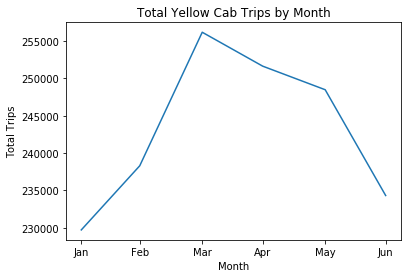

In [12]:
import matplotlib.pyplot as plt
plt.plot(monthly_count)
plt.xticks(months, month_labels)
plt.xlabel('Month')
plt.ylabel('Total Trips')
plt.title('Total Yellow Cab Trips by Month')
plt.show()

In [19]:
daily_trips = taxis['pickup_datetime'].resample('D').count()

In [31]:
smoothed_7d = daily_trips.rolling(window=7).mean()

In [29]:
smoothed_30d = daily_trips.rolling(window=30).mean()

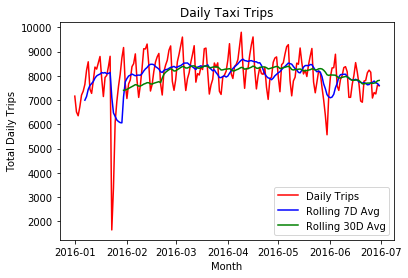

In [36]:
plot1, = plt.plot(daily_trips, color='red')
plot2, = plt.plot(smoothed_7d, color='blue')
plot3, = plt.plot(smoothed_30d, color='green')
plt.xlabel('Month')
plt.ylabel('Total Daily Trips')
plt.title('Daily Taxi Trips')
plt.legend([plot1, plot2, plot3], ['Daily Trips','Rolling 7D Avg','Rolling 30D Avg'], loc='lower right')
plt.show()

In [38]:
#Find outlier in January
print(daily_trips.loc['2016-01'])

2016-01-01    7162
2016-01-02    6512
2016-01-03    6353
2016-01-04    6725
2016-01-05    7204
2016-01-06    7365
2016-01-07    7649
2016-01-08    8229
2016-01-09    8578
2016-01-10    7454
2016-01-11    7276
2016-01-12    7794
2016-01-13    8360
2016-01-14    8277
2016-01-15    8539
2016-01-16    8797
2016-01-17    7891
2016-01-18    7146
2016-01-19    7934
2016-01-20    8018
2016-01-21    8375
2016-01-22    8805
2016-01-23    1648
2016-01-24    3383
2016-01-25    6084
2016-01-26    6941
2016-01-27    7571
2016-01-28    8066
2016-01-29    8735
2016-01-30    9166
2016-01-31    7670
Freq: D, Name: pickup_datetime, dtype: int64


In [44]:
#Check weather for January 23rd
print(taxis.loc['2016-01-23'].iloc[:,-18:])

                     station_num               station_name  station_latitude  \
2016-01-23 08:46:42  USW00014732  LA GUARDIA AIRPORT, NY US           40.7792   
2016-01-23 00:06:25  USW00014732  LA GUARDIA AIRPORT, NY US           40.7792   
2016-01-23 10:38:43  USW00014732  LA GUARDIA AIRPORT, NY US           40.7792   
2016-01-23 01:16:58  USW00014732  LA GUARDIA AIRPORT, NY US           40.7792   
2016-01-23 00:19:01  USW00014732  LA GUARDIA AIRPORT, NY US           40.7792   
2016-01-23 01:53:10  USW00014732  LA GUARDIA AIRPORT, NY US           40.7792   
2016-01-23 00:59:34  USW00014732  LA GUARDIA AIRPORT, NY US           40.7792   
2016-01-23 00:56:53  USW00014732  LA GUARDIA AIRPORT, NY US           40.7792   
2016-01-23 07:14:28  USW00014732  LA GUARDIA AIRPORT, NY US           40.7792   
2016-01-23 03:05:17  USW00014732  LA GUARDIA AIRPORT, NY US           40.7792   
2016-01-23 08:47:23  USW00014732  LA GUARDIA AIRPORT, NY US           40.7792   
2016-01-23 01:42:47  USW0001

AttributeError: 'NoneType' object has no attribute 'drop_duplicates'

In [47]:
#Find outlier in late May
print(daily_trips.loc['2016-05'])

2016-05-01    7964
2016-05-02    7344
2016-05-03    8457
2016-05-04    8535
2016-05-05    8896
2016-05-06    9202
2016-05-07    9285
2016-05-08    7801
2016-05-09    7174
2016-05-10    7789
2016-05-11    7941
2016-05-12    8524
2016-05-13    8476
2016-05-14    9147
2016-05-15    8547
2016-05-16    8077
2016-05-17    8237
2016-05-18    7971
2016-05-19    8455
2016-05-20    8808
2016-05-21    9127
2016-05-22    7745
2016-05-23    7300
2016-05-24    7762
2016-05-25    8195
2016-05-26    8121
2016-05-27    7530
2016-05-28    7004
2016-05-29    6372
2016-05-30    5570
2016-05-31    7131
Freq: D, Name: pickup_datetime, dtype: int64


In [48]:
#Weather on May 30
print(taxis.loc['2016-05-30'].iloc[:,-18:])

                     station_num               station_name  station_latitude  \
2016-05-30 13:33:07  USW00014732  LA GUARDIA AIRPORT, NY US           40.7792   
2016-05-30 13:08:31  USW00014732  LA GUARDIA AIRPORT, NY US           40.7792   
2016-05-30 12:13:20  USW00014732  LA GUARDIA AIRPORT, NY US           40.7792   
2016-05-30 04:01:54  USW00014732  LA GUARDIA AIRPORT, NY US           40.7792   
2016-05-30 23:02:53  USW00014732  LA GUARDIA AIRPORT, NY US           40.7792   
2016-05-30 18:50:20  USW00014732  LA GUARDIA AIRPORT, NY US           40.7792   
2016-05-30 13:02:11  USW00014732  LA GUARDIA AIRPORT, NY US           40.7792   
2016-05-30 21:17:15  USW00014732  LA GUARDIA AIRPORT, NY US           40.7792   
2016-05-30 19:48:45  USW00014732  LA GUARDIA AIRPORT, NY US           40.7792   
2016-05-30 10:37:19  USW00014732  LA GUARDIA AIRPORT, NY US           40.7792   
2016-05-30 00:18:41  USW00014732  LA GUARDIA AIRPORT, NY US           40.7792   
2016-05-30 16:22:40  USW0001

A quick Google search reveals that May 30, 2016 was Memorial Day!